In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
data = pd.read_csv("moore.csv", header=None).values
X = data[:, 0].reshape(-1,1) # make it 2-D array of size N x D where D=1
Y = data[:,1]

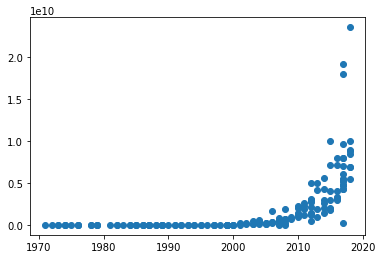

In [3]:
# Plot the data - it is exponential
plt.scatter(X,Y)

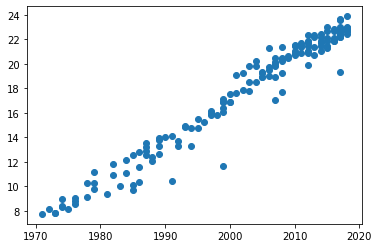

In [4]:
# Since we want a linear model. let's take the log
Y = np.log(Y)
plt.scatter(X, Y)

# seems linear

In [5]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have a reverse the trahnsformation later
X = X - X.mean()

### model

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [7]:
# SGD = Stocastic Gradient Descent
# SGD(lerning rate, momentum)
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
             loss=['mse'])

In [8]:
# learning rate scheduler

def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

In [9]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [10]:
# train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 326.9295
Epoch 2/200
6/6 [==============================] - 0s 825us/step - loss: 282.3395
Epoch 3/200
6/6 [==============================] - 0s 932us/step - loss: 284.4012
Epoch 4/200
6/6 [==============================] - 0s 970us/step - loss: 236.7912
Epoch 5/200
6/6 [==============================] - 0s 721us/step - loss: 231.4675
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 132.6086
Epoch 7/200
6/6 [==============================] - 0s 836us/step - loss: 94.5982
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 78.0315
Epoch 9/200
6/6 [==============================] - 0s 880us/step - loss: 46.7747
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 34.4345
Epoch 11/200
6/6 [==============================] - 0s 902us/step - loss: 25.9943
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 25.1077
Epoch 13/200
6/6 [===========

6/6 [==============================] - 0s 989us/step - loss: 0.8732
Epoch 103/200
6/6 [==============================] - 0s 868us/step - loss: 0.8701
Epoch 104/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8719
Epoch 105/200
6/6 [==============================] - 0s 766us/step - loss: 0.8710
Epoch 106/200
6/6 [==============================] - 0s 966us/step - loss: 0.8725
Epoch 107/200
6/6 [==============================] - 0s 760us/step - loss: 0.8714
Epoch 108/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8720
Epoch 109/200
6/6 [==============================] - 0s 808us/step - loss: 0.8881
Epoch 110/200
6/6 [==============================] - 0s 791us/step - loss: 0.8837
Epoch 111/200
6/6 [==============================] - 0s 800us/step - loss: 0.8716
Epoch 112/200
6/6 [==============================] - 0s 814us/step - loss: 0.8939
Epoch 113/200
6/6 [==============================] - 0s 922us/step - loss: 0.9030
Epoch 114/200
6/6 [===============

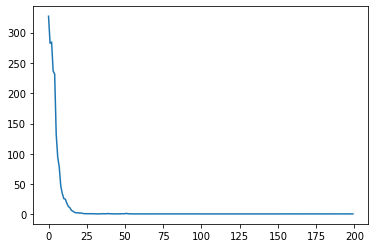

In [11]:
plt.plot(r.history['loss'], label='loss')

In [12]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3229882]], dtype=float32), array([17.764952], dtype=float32)]


shape of weight: W.shape = (D,W)\
shape of b:      b.shape = (M,)\

D = inputsize\
M = output size

In [13]:
a = model.layers[0].get_weights()[0][0]

original model for exponential grouth is:
$$ C = A_0r^t $$
$$ logC = logr * t + logA_0$$
this is our linear equation:
$$ \hat{y} = ax + b $$

where:
$$ \hat{y} = logC$$
$$ a = log r$$
$$ x = t $$
$$ b = log A_0 $$

We are interested in r, becuase that's the rate of growth. Given our regression weights, we know that:
$$ a = 0.34188038 $$

so that:
$$ r = e^0.34188038 = 1.4076 $$

In [14]:
print("Time to double:", np.log(2) / a)

Time to double: [2.1460447]


### Making Predictions

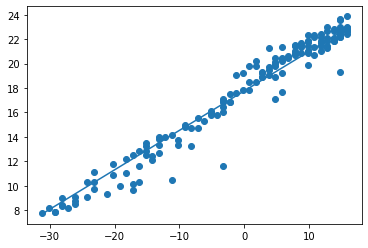

In [15]:
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X, Yhat)

In [17]:
# Manual calculations

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X becuase we flattened it again earlier
X = X.reshape(-1,1)

# (N x 1) x (1 x 1)+{1} --> (N ㅌ 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True